In [18]:
import pandas as pd

data = pd.read_csv("../pm2_data.csv")

data.head()

,Unnamed: 0,Site,Parameter,Date (LT),Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,Raw Conc.,Conc. Unit,Duration,QC Name
0,0,Bishkek,PM2.5 - Principal,2019-02-06 06:00:00,2019,2,6,6,-999.0,-999,NaN,12.0,UG/M3,1 Hr,Valid
1,1,Bishkek,PM2.5 - Principal,2019-02-06 07:00:00,2019,2,6,7,17.0,61,Moderate,20.0,UG/M3,1 Hr,Valid
2,2,Bishkek,PM2.5 - Principal,2019-02-06 08:00:00,2019,2,6,8,19.1,66,Moderate,21.0,UG/M3,1 Hr,Valid
3,3,Bishkek,PM2.5 - Principal,2019-02-06 09:00:00,2019,2,6,9,22.4,73,Moderate,25.0,UG/M3,1 Hr,Valid
4,4,Bishkek,PM2.5 - Principal,2019-02-06 10:00:00,2019,2,6,10,30.9,91,Moderate,39.0,UG/M3,1 Hr,Valid


In [19]:
data.isnull().sum()

Unnamed: 0         0
Site               0
Parameter          0
Date (LT)          0
Year               0
Month              0
Day                0
Hour               0
NowCast Conc.      0
AQI                0
AQI Category     202
Raw Conc.          0
Conc. Unit         0
Duration           0
QC Name            0
dtype: int64

In [20]:
data.dropna(inplace=True)

In [21]:
data['QC Name'].unique()

array(['Valid', 'Invalid', 'Missing', 'Suspect'], dtype=object)

In [22]:
data.drop('Unnamed: 0',axis=1, inplace=True)
data.drop('Site',axis=1, inplace=True)
data.drop('Parameter',axis=1, inplace=True)
data.drop('Date (LT)',axis=1, inplace=True)
data.drop('Conc. Unit',axis=1, inplace=True)
data.drop('Duration',axis=1, inplace=True)


In [23]:
data.drop('AQI',axis=1, inplace=True)

In [24]:
data.drop('QC Name',axis=1, inplace=True)

In [25]:
data.head()

,Year,Month,Day,Hour,NowCast Conc.,AQI Category,Raw Conc.
1,2019,2,6,7,17.0,Moderate,20.0
2,2019,2,6,8,19.1,Moderate,21.0
3,2019,2,6,9,22.4,Moderate,25.0
4,2019,2,6,10,30.9,Moderate,39.0
5,2019,2,6,11,35.0,Moderate,39.0


In [26]:
data['AQI Category'].unique()

array(['Moderate', 'Unhealthy for Sensitive Groups', 'Unhealthy',
       'Very Unhealthy', 'Hazardous', 'Good'], dtype=object)

In [27]:
# Hot encoding
# importing sklearn one hot encoding
from sklearn.preprocessing import OneHotEncoder
# initializing one hot encoding
encoding = OneHotEncoder()


In [28]:
# applying one hot encoding in python
#transformed_data = encoding.fit_transform(data[['QC Name']])

In [29]:
# Getting one hot encoded categories
#print(encoding.categories_)

In [30]:
# adding the encoded values
#data[encoding.categories_[0]] = transformed_data.toarray()

# deleting the uncoded one
#data.drop('QC Name', axis=1, inplace=True)

# data heading
data.head()

,Year,Month,Day,Hour,NowCast Conc.,AQI Category,Raw Conc.
1,2019,2,6,7,17.0,Moderate,20.0
2,2019,2,6,8,19.1,Moderate,21.0
3,2019,2,6,9,22.4,Moderate,25.0
4,2019,2,6,10,30.9,Moderate,39.0
5,2019,2,6,11,35.0,Moderate,39.0


In [31]:
# # Import sklearn labelencoder
# from sklearn import preprocessing
  
# # initializing sklearn labelencoder
# label_encoder = preprocessing.LabelEncoder()
  
# # encoding marrige column
# data['AQI Category']= label_encoder.fit_transform(data['AQI Category'])


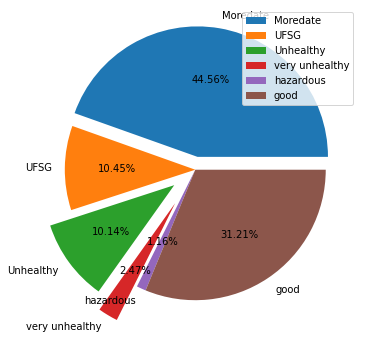

In [32]:
# importing numpy
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize = ( 15, 6))

# Creating explode data
explode = (0.1, 0.0, 0.2, 0.3, 0.0, 0.0)

# creating variables
one = 0
two = 0
three = 0
four = 0
five = 0
six = 0
# for loop to itreate through the output class
for i in data['AQI Category']:
    if i =="Moderate":
        one+=1
    elif i =='Unhealthy for Sensitive Groups':
        two+=1
    elif i == 'Unhealthy':
        three+=1
    elif i == 'Very Unhealthy':
        four+=1
    elif i == 'Hazardous':
        five+=1
    elif i == 'Good':
        six+=1
# creating numpy arry
labels = ['Moredate', 'UFSG', 'Unhealthy', 'very unhealthy', 'hazardous', 'good']

values = np.array([one, two, three, four, five, six])
plt.pie(values, labels = labels, autopct='%1.2f%%', explode = explode,)
plt.legend()
plt.show()

In [16]:
one = 0
two = 0
three = 0
four = 0
five = 0
six = 0
# for loop to itreate through the output class
for i in data['AQI Category']:
    if i ==0:
        one+=1
    elif i ==1:
        two+=1
    elif i == 2:
        three+=1
    elif i == 3:
        four+=1
    elif i == 4:
        five+=1
    elif i == 5:
        six+=1

In [17]:
print(one)
print(two)
print(three)
print(four)
print(five)
print(six)

10400
387
14846
3380
3482
823


In [18]:
# splitting the dataset into input and output
Input = data.drop('AQI Category', axis=1)

Output =data['AQI Category']

In [19]:
from sklearn.model_selection import train_test_split


# splitting into testing and training parts
X_train, X_test, y_train, y_test = train_test_split(Input, Output, test_size=0.30, random_state=40)

In [20]:
X_train.shape

(23322, 6)

In [21]:
# importing the CatBoot classifier
from catboost import CatBoostClassifier

# initializing the CatBoost classifier
CatBoost_clf = CatBoostClassifier()

# training the catboost classifier model
CatBoost_clf.fit(X_train, y_train)

Learning rate set to 0.092914
0:	learn: 1.3798804	total: 83.1ms	remaining: 1m 23s
1:	learn: 1.1343581	total: 98.9ms	remaining: 49.4s
2:	learn: 0.9582650	total: 108ms	remaining: 35.8s
3:	learn: 0.8214019	total: 115ms	remaining: 28.6s
4:	learn: 0.7133539	total: 122ms	remaining: 24.2s
5:	learn: 0.6301497	total: 129ms	remaining: 21.3s
6:	learn: 0.5573975	total: 135ms	remaining: 19.2s
7:	learn: 0.4942551	total: 143ms	remaining: 17.7s
8:	learn: 0.4401321	total: 151ms	remaining: 16.6s
9:	learn: 0.3947259	total: 158ms	remaining: 15.7s
10:	learn: 0.3555105	total: 170ms	remaining: 15.2s
11:	learn: 0.3199389	total: 178ms	remaining: 14.6s
12:	learn: 0.2892066	total: 186ms	remaining: 14.1s
13:	learn: 0.2621216	total: 196ms	remaining: 13.8s
14:	learn: 0.2373519	total: 205ms	remaining: 13.4s
15:	learn: 0.2151767	total: 216ms	remaining: 13.3s
16:	learn: 0.1959422	total: 223ms	remaining: 12.9s
17:	learn: 0.1787688	total: 233ms	remaining: 12.7s
18:	learn: 0.1633222	total: 242ms	remaining: 12.5s
19:	lear

185:	learn: 0.0093507	total: 1.6s	remaining: 7s
186:	learn: 0.0093408	total: 1.61s	remaining: 6.99s
187:	learn: 0.0093308	total: 1.62s	remaining: 6.98s
188:	learn: 0.0093176	total: 1.63s	remaining: 6.97s
189:	learn: 0.0092893	total: 1.63s	remaining: 6.97s
190:	learn: 0.0092527	total: 1.64s	remaining: 6.96s
191:	learn: 0.0092079	total: 1.65s	remaining: 6.94s
192:	learn: 0.0091804	total: 1.66s	remaining: 6.93s
193:	learn: 0.0091511	total: 1.66s	remaining: 6.92s
194:	learn: 0.0091196	total: 1.67s	remaining: 6.91s
195:	learn: 0.0090757	total: 1.68s	remaining: 6.89s
196:	learn: 0.0090330	total: 1.69s	remaining: 6.88s
197:	learn: 0.0090229	total: 1.7s	remaining: 6.87s
198:	learn: 0.0089919	total: 1.7s	remaining: 6.86s
199:	learn: 0.0089736	total: 1.71s	remaining: 6.84s
200:	learn: 0.0089645	total: 1.72s	remaining: 6.83s
201:	learn: 0.0089483	total: 1.72s	remaining: 6.81s
202:	learn: 0.0088984	total: 1.73s	remaining: 6.8s
203:	learn: 0.0088721	total: 1.74s	remaining: 6.79s
204:	learn: 0.00884

358:	learn: 0.0064213	total: 3.01s	remaining: 5.37s
359:	learn: 0.0064170	total: 3.02s	remaining: 5.36s
360:	learn: 0.0064121	total: 3.03s	remaining: 5.36s
361:	learn: 0.0063925	total: 3.04s	remaining: 5.36s
362:	learn: 0.0063741	total: 3.05s	remaining: 5.35s
363:	learn: 0.0063679	total: 3.06s	remaining: 5.34s
364:	learn: 0.0063623	total: 3.06s	remaining: 5.33s
365:	learn: 0.0063586	total: 3.07s	remaining: 5.32s
366:	learn: 0.0063545	total: 3.08s	remaining: 5.31s
367:	learn: 0.0063175	total: 3.09s	remaining: 5.3s
368:	learn: 0.0063110	total: 3.09s	remaining: 5.29s
369:	learn: 0.0063055	total: 3.1s	remaining: 5.28s
370:	learn: 0.0062991	total: 3.11s	remaining: 5.27s
371:	learn: 0.0062955	total: 3.12s	remaining: 5.27s
372:	learn: 0.0062913	total: 3.13s	remaining: 5.26s
373:	learn: 0.0062889	total: 3.14s	remaining: 5.25s
374:	learn: 0.0062854	total: 3.15s	remaining: 5.25s
375:	learn: 0.0062764	total: 3.16s	remaining: 5.24s
376:	learn: 0.0062705	total: 3.17s	remaining: 5.23s
377:	learn: 0.

520:	learn: 0.0049648	total: 4.43s	remaining: 4.07s
521:	learn: 0.0049561	total: 4.44s	remaining: 4.06s
522:	learn: 0.0049488	total: 4.45s	remaining: 4.06s
523:	learn: 0.0049396	total: 4.46s	remaining: 4.05s
524:	learn: 0.0049314	total: 4.46s	remaining: 4.04s
525:	learn: 0.0049303	total: 4.47s	remaining: 4.03s
526:	learn: 0.0049236	total: 4.48s	remaining: 4.02s
527:	learn: 0.0049212	total: 4.49s	remaining: 4.01s
528:	learn: 0.0049055	total: 4.5s	remaining: 4s
529:	learn: 0.0048965	total: 4.5s	remaining: 3.99s
530:	learn: 0.0048918	total: 4.51s	remaining: 3.98s
531:	learn: 0.0048895	total: 4.52s	remaining: 3.97s
532:	learn: 0.0048829	total: 4.53s	remaining: 3.96s
533:	learn: 0.0048706	total: 4.53s	remaining: 3.96s
534:	learn: 0.0048613	total: 4.54s	remaining: 3.95s
535:	learn: 0.0048589	total: 4.55s	remaining: 3.94s
536:	learn: 0.0048453	total: 4.56s	remaining: 3.93s
537:	learn: 0.0048415	total: 4.56s	remaining: 3.92s
538:	learn: 0.0048384	total: 4.57s	remaining: 3.91s
539:	learn: 0.004

700:	learn: 0.0038974	total: 5.83s	remaining: 2.49s
701:	learn: 0.0038920	total: 5.84s	remaining: 2.48s
702:	learn: 0.0038902	total: 5.85s	remaining: 2.47s
703:	learn: 0.0038769	total: 5.86s	remaining: 2.46s
704:	learn: 0.0038709	total: 5.87s	remaining: 2.46s
705:	learn: 0.0038676	total: 5.88s	remaining: 2.45s
706:	learn: 0.0038557	total: 5.88s	remaining: 2.44s
707:	learn: 0.0038493	total: 5.89s	remaining: 2.43s
708:	learn: 0.0038442	total: 5.9s	remaining: 2.42s
709:	learn: 0.0038370	total: 5.91s	remaining: 2.41s
710:	learn: 0.0038350	total: 5.92s	remaining: 2.4s
711:	learn: 0.0038287	total: 5.92s	remaining: 2.4s
712:	learn: 0.0038236	total: 5.93s	remaining: 2.39s
713:	learn: 0.0038219	total: 5.94s	remaining: 2.38s
714:	learn: 0.0038166	total: 5.95s	remaining: 2.37s
715:	learn: 0.0038106	total: 5.95s	remaining: 2.36s
716:	learn: 0.0038009	total: 5.96s	remaining: 2.35s
717:	learn: 0.0037998	total: 5.97s	remaining: 2.34s
718:	learn: 0.0037926	total: 5.98s	remaining: 2.33s
719:	learn: 0.0

876:	learn: 0.0031546	total: 7.23s	remaining: 1.01s
877:	learn: 0.0031461	total: 7.24s	remaining: 1.01s
878:	learn: 0.0031390	total: 7.25s	remaining: 998ms
879:	learn: 0.0031375	total: 7.26s	remaining: 990ms
880:	learn: 0.0031336	total: 7.27s	remaining: 982ms
881:	learn: 0.0031317	total: 7.28s	remaining: 974ms
882:	learn: 0.0031262	total: 7.28s	remaining: 965ms
883:	learn: 0.0031199	total: 7.29s	remaining: 957ms
884:	learn: 0.0031175	total: 7.3s	remaining: 949ms
885:	learn: 0.0031104	total: 7.31s	remaining: 941ms
886:	learn: 0.0031094	total: 7.32s	remaining: 932ms
887:	learn: 0.0031084	total: 7.32s	remaining: 924ms
888:	learn: 0.0031072	total: 7.33s	remaining: 915ms
889:	learn: 0.0031064	total: 7.34s	remaining: 907ms
890:	learn: 0.0031057	total: 7.34s	remaining: 899ms
891:	learn: 0.0031024	total: 7.35s	remaining: 890ms
892:	learn: 0.0030980	total: 7.36s	remaining: 882ms
893:	learn: 0.0030902	total: 7.37s	remaining: 874ms
894:	learn: 0.0030878	total: 7.38s	remaining: 866ms
895:	learn: 0

In [22]:
# making predictions
catboost_pred = CatBoost_clf.predict(X_test)

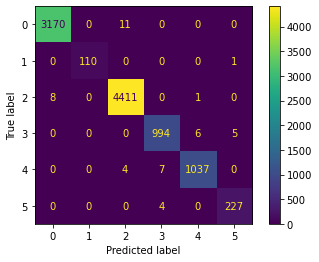

In [23]:
# importing modules
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# <a href="https://techfor-today.com/sklearn-confusion-matrix-in-machine-learning/">confusion matrix</a> plotting
cm = confusion_matrix(y_test, catboost_pred, labels=CatBoost_clf.classes_)

# labelling
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=CatBoost_clf.classes_)
disp.plot()
plt.show()

In [24]:
# importing the module
from sklearn.metrics import accuracy_score

# printing
print("The accuracy is: ", accuracy_score(y_test, catboost_pred))

The accuracy is:  0.9952981192476991


In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test, catboost_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3181
           1       1.00      0.99      1.00       111
           2       1.00      1.00      1.00      4420
           3       0.99      0.99      0.99      1005
           4       0.99      0.99      0.99      1048
           5       0.97      0.98      0.98       231

    accuracy                           1.00      9996
   macro avg       0.99      0.99      0.99      9996
weighted avg       1.00      1.00      1.00      9996



In [26]:
catboost_pred_train = CatBoost_clf.predict(X_train)

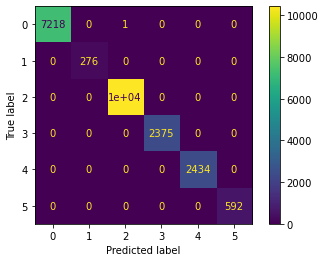

In [27]:
cm = confusion_matrix(y_train, catboost_pred_train, labels=CatBoost_clf.classes_)

# labelling
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=CatBoost_clf.classes_)
disp.plot()
plt.show()

In [28]:
# printing
print("The accuracy is: ", accuracy_score(y_train, catboost_pred_train))

The accuracy is:  0.9999571220307006


In [29]:
print(classification_report(y_train, catboost_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7219
           1       1.00      1.00      1.00       276
           2       1.00      1.00      1.00     10426
           3       1.00      1.00      1.00      2375
           4       1.00      1.00      1.00      2434
           5       1.00      1.00      1.00       592

    accuracy                           1.00     23322
   macro avg       1.00      1.00      1.00     23322
weighted avg       1.00      1.00      1.00     23322



In [30]:
# importing the lightgbm module
import lightgbm as lgb

# initializing the model
model_Clf = lgb.LGBMClassifier()

# training the model
model_Clf.fit(X_train, y_train)

LGBMClassifier()

In [31]:
# making prediction 
clf_pred = model_Clf.predict(X_test)
clf_pred_train= model_Clf.predict(X_train)

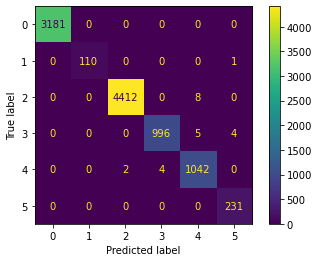

In [32]:
# importing modules
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# confusion matrix plotting
cm = confusion_matrix(y_test, clf_pred, labels=model_Clf.classes_)

# labelling
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_Clf.classes_)
disp.plot()
plt.show()

In [33]:
# importing the module
from sklearn.metrics import accuracy_score

# printing
print("The accuracy is: ", accuracy_score(y_test, clf_pred))

The accuracy is:  0.9975990396158463


In [34]:
print(classification_report(y_test, clf_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3181
           1       1.00      0.99      1.00       111
           2       1.00      1.00      1.00      4420
           3       1.00      0.99      0.99      1005
           4       0.99      0.99      0.99      1048
           5       0.98      1.00      0.99       231

    accuracy                           1.00      9996
   macro avg       0.99      1.00      0.99      9996
weighted avg       1.00      1.00      1.00      9996



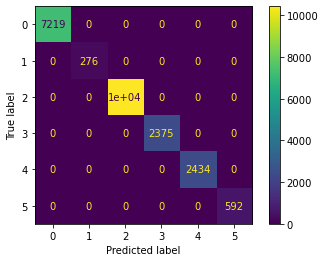

In [35]:
cm = confusion_matrix(y_train, clf_pred_train, labels=CatBoost_clf.classes_)

# labelling
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=CatBoost_clf.classes_)
disp.plot()
plt.show()

In [36]:
print("The accuracy is: ", accuracy_score(y_train, clf_pred_train))
print(classification_report(y_train, clf_pred_train))

The accuracy is:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7219
           1       1.00      1.00      1.00       276
           2       1.00      1.00      1.00     10426
           3       1.00      1.00      1.00      2375
           4       1.00      1.00      1.00      2434
           5       1.00      1.00      1.00       592

    accuracy                           1.00     23322
   macro avg       1.00      1.00      1.00     23322
weighted avg       1.00      1.00      1.00     23322



In [37]:
# importing sklearn knn classifier
from sklearn.neighbors import KNeighborsClassifier

# K value set to be 3
classifer = KNeighborsClassifier(n_neighbors=5 )

In [38]:
# model training
classifer.fit(X_train,y_train)

KNeighborsClassifier()

In [43]:
# making predictions
y_pred = classifer.predict(X_test)
y_pred_train = classifer.predict(X_train)

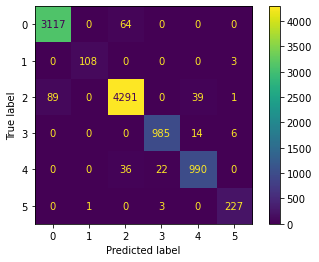

In [44]:
# importing modules
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# confusion matrix plotting
cm = confusion_matrix(y_test, y_pred, labels=model_Clf.classes_)

# labelling
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_Clf.classes_)
disp.plot()
plt.show()

In [45]:
# importing accuracy score
from sklearn.metrics import accuracy_score

# printing the accuracy 
accuracy_score(y_test,y_pred) 

0.97218887555022

In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      3181
           1       0.99      0.97      0.98       111
           2       0.98      0.97      0.97      4420
           3       0.98      0.98      0.98      1005
           4       0.95      0.94      0.95      1048
           5       0.96      0.98      0.97       231

    accuracy                           0.97      9996
   macro avg       0.97      0.97      0.97      9996
weighted avg       0.97      0.97      0.97      9996



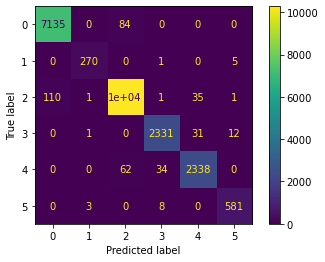

In [47]:
cm = confusion_matrix(y_train, y_pred_train, labels=classifer.classes_)

# labelling
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=CatBoost_clf.classes_)
disp.plot()
plt.show()

In [48]:
print("The accuracy is: ", accuracy_score(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

The accuracy is:  0.9833204699425435
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      7219
           1       0.98      0.98      0.98       276
           2       0.99      0.99      0.99     10426
           3       0.98      0.98      0.98      2375
           4       0.97      0.96      0.97      2434
           5       0.97      0.98      0.98       592

    accuracy                           0.98     23322
   macro avg       0.98      0.98      0.98     23322
weighted avg       0.98      0.98      0.98     23322



In [170]:
data.head()

,Year,Month,Day,Hour,NowCast Conc.,AQI Category,Raw Conc.
1,2019,2,6,7,17.0,Moderate,20.0
2,2019,2,6,8,19.1,Moderate,21.0
3,2019,2,6,9,22.4,Moderate,25.0
4,2019,2,6,10,30.9,Moderate,39.0
5,2019,2,6,11,35.0,Moderate,39.0


In [195]:
# importing required module for Neural Networks for Classification using TensorFlow
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import InputLayer
from tensorflow.keras import Sequential

In [196]:
# defineNeural Networks for Classification using TensorFlow model
model = Sequential()
# adding input layer with 16 nodes
model.add(InputLayer(6))
# adding hidden layer with 10 nodes
model.add(Dense(10, activation='relu', kernel_initializer='he_normal'))

In [197]:
# adding output layer 
model.add(Dense(6, activation='softmax'))

In [198]:
# compile the Neural Networks for Classification using TensorFlow model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# fit the model
model.fit(X_train, y_train, epochs=50)

Epoch 1/50
729/729 [==============================] - 2s 2ms/step - loss: 526.0876 - accuracy: 0.3186
Epoch 2/50
729/729 [==============================] - 1s 2ms/step - loss: 3.6266 - accuracy: 0.7104
Epoch 3/50
729/729 [==============================] - 1s 2ms/step - loss: 2.0820 - accuracy: 0.8239
Epoch 4/50
729/729 [==============================] - 1s 2ms/step - loss: 1.6742 - accuracy: 0.8436
Epoch 5/50
729/729 [==============================] - 2s 2ms/step - loss: 1.3785 - accuracy: 0.8564
Epoch 6/50
729/729 [==============================] - 1s 2ms/step - loss: 1.0989 - accuracy: 0.8706
Epoch 7/50
729/729 [==============================] - 2s 2ms/step - loss: 0.9099 - accuracy: 0.8695
Epoch 8/50
729/729 [==============================] - 1s 2ms/step - loss: 0.7967 - accuracy: 0.8671
Epoch 9/50
729/729 [==============================] - 1s 2ms/step - loss: 0.6601 - accuracy: 0.8721
Epoch 10/50
729/729 [==============================] - 1s 2ms/step - loss: 0.5918 - accuracy: 0.88

In [199]:
# evaluate Neural Networks for Classification using TensorFlow
evaluate = model.evaluate(X_test, y_test)
print('Test Accuracy:', evaluate[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.0866 - accuracy: 0.9688
Test Accuracy: 0.9687874913215637


In [ ]:
print(classification_report(y_test, y_pred))